we need to read the image in RBG format and then convert it to a grayscale image. This will turn an image into a classic black and white photo.

Then the next thing to do is invert the grayscale image also called negative image, this will be our inverted grayscale image. Inversion can be used to enhance details.

Then we can finally create the pencil sketch by mixing the grayscale image with the inverted blurry image. This can be done by dividing the grayscale image by the inverted blurry image. Since images are just arrays, we can easily do this programmatically using the divide function from the cv2 library in Python.

## converting an image into a pencil sketch with Python is an OpenCV

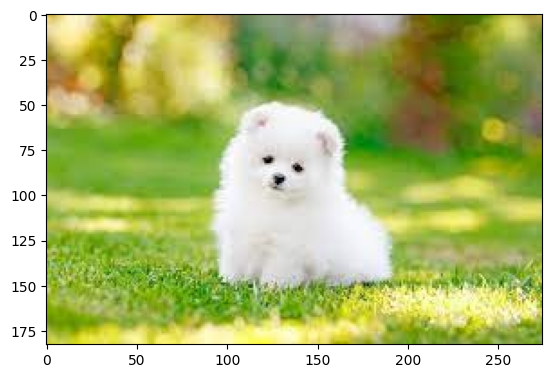

In [ ]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread("/content/dog.jpeg")

# OpenCV reads images in BGR format, but matplotlib expects them in RGB format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()


## Now after reading the image, we will create a new image by converting the original image to greyscale

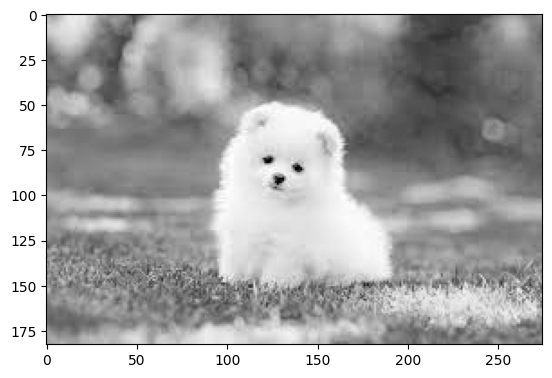

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap="gray")
plt.show()

## Now the next step is to invert the new grayscale image:

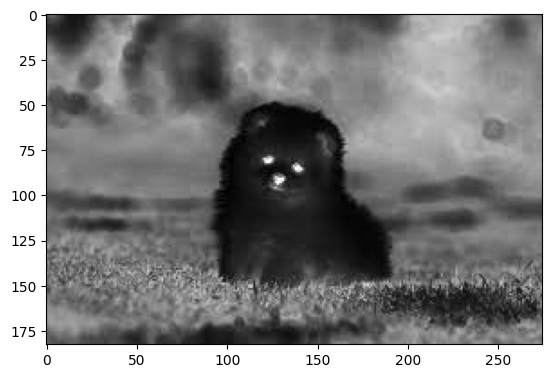

In [ ]:
inverted_image = 255 - gray_image

# Normalize the pixel values to the range of 0 to 1
inverted_image_norm = inverted_image / 255.0

plt.imshow(inverted_image_norm, cmap="gray")
plt.show()

## Now the next step in the process is to blur the image by using the Gaussian Function in OpenCV

In [ ]:
blurred = cv2.GaussianBlur(inverted_image, (21, 21), 0)

## Then the final step is to invert the blurred image

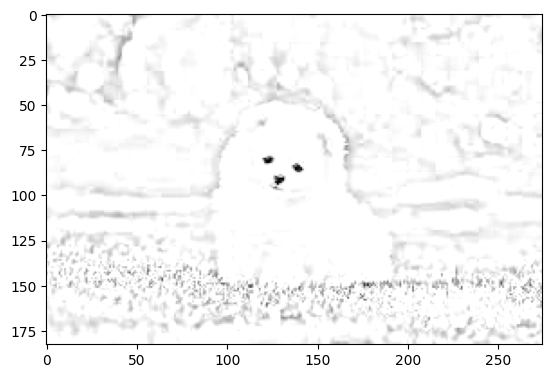

In [ ]:
inverted_blurred = 255 - blurred
pencil_sketch = cv2.divide(gray_image, inverted_blurred, scale=256.0)

plt.imshow(pencil_sketch, cmap="gray")
plt.show()

## a look at both the original image and the pencil sketch 

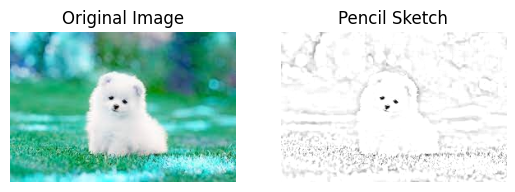

In [ ]:
fig, axs = plt.subplots(1, 2)

axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(pencil_sketch, cmap="gray")
axs[1].set_title("Pencil Sketch")
axs[1].axis("off")

plt.show()